In [251]:
# necessary import declarations
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
#read required files
homes = pd.read_csv("City_Zhvi_AllHomes.csv")
gdp = pd.read_excel("gdplev.xls", skiprows=7)
uni_towns = pd.read_csv("university_towns.txt", sep="\t", header=None)

In [254]:
homes.describe

<bound method NDFrame.describe of        RegionID           RegionName State                           Metro  \
0          6181             New York    NY                        New York   
1         12447          Los Angeles    CA  Los Angeles-Long Beach-Anaheim   
2         17426              Chicago    IL                         Chicago   
3         13271         Philadelphia    PA                    Philadelphia   
4         40326              Phoenix    AZ                         Phoenix   
...         ...                  ...   ...                             ...   
10725    398292  Town of Wrightstown    WI                       Green Bay   
10726    398343               Urbana    NY                         Corning   
10727    398496          New Denmark    WI                       Green Bay   
10728    398839               Angels    CA                             NaN   
10729    399114              Holland    WI                       Sheboygan   

         CountyName  SizeRank

In [255]:
gdp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1929.0,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
1,1930.0,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
2,1931.0,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN
3,1932.0,59.5,788.2,NaN,1947q4,260.3,1960.7,NaN
4,1933.0,57.2,778.3,NaN,1948q1,266.2,1989.5,NaN


In [256]:
gdp.describe

<bound method NDFrame.describe of      Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0        1929.0       104.6      1056.6         NaN     1947q1       243.1   
1        1930.0        92.2       966.7         NaN     1947q2       246.3   
2        1931.0        77.4       904.8         NaN     1947q3       250.1   
3        1932.0        59.5       788.2         NaN     1947q4       260.3   
4        1933.0        57.2       778.3         NaN     1948q1       266.2   
..          ...         ...         ...         ...        ...         ...   
273         NaN         NaN         NaN         NaN     2015q2     17998.3   
274         NaN         NaN         NaN         NaN     2015q3     18141.9   
275         NaN         NaN         NaN         NaN     2015q4     18222.8   
276         NaN         NaN         NaN         NaN     2016q1     18281.6   
277         NaN         NaN         NaN         NaN     2016q2     18450.1   

     Unnamed: 6  Unnamed: 7  

In [257]:
uni_towns.head()

,0
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]


# Reformatting wikipedia file

In [258]:
with open("university_towns.txt") as file:
    university_towns = file.readlines()
    uni_town_data = []
    for record in university_towns:
        institute = record[:-1]
        if record[-7:] == '[edit]\n':
            region = record[:-7]
            continue
        elif '(' in record:
            institute = record[:record.find('(') - 1]
                
        uni_town_data.append((region, institute))
        
    mapped_uni_town_data = pd.DataFrame(data=uni_town_data, columns=['State', 'RegionName'])
mapped_uni_town_data.head()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


# Visualizing states with university towns count

<AxesSubplot:title={'center':'State wise university towns count'}, xlabel='States', ylabel='Number of Uni Towns'>

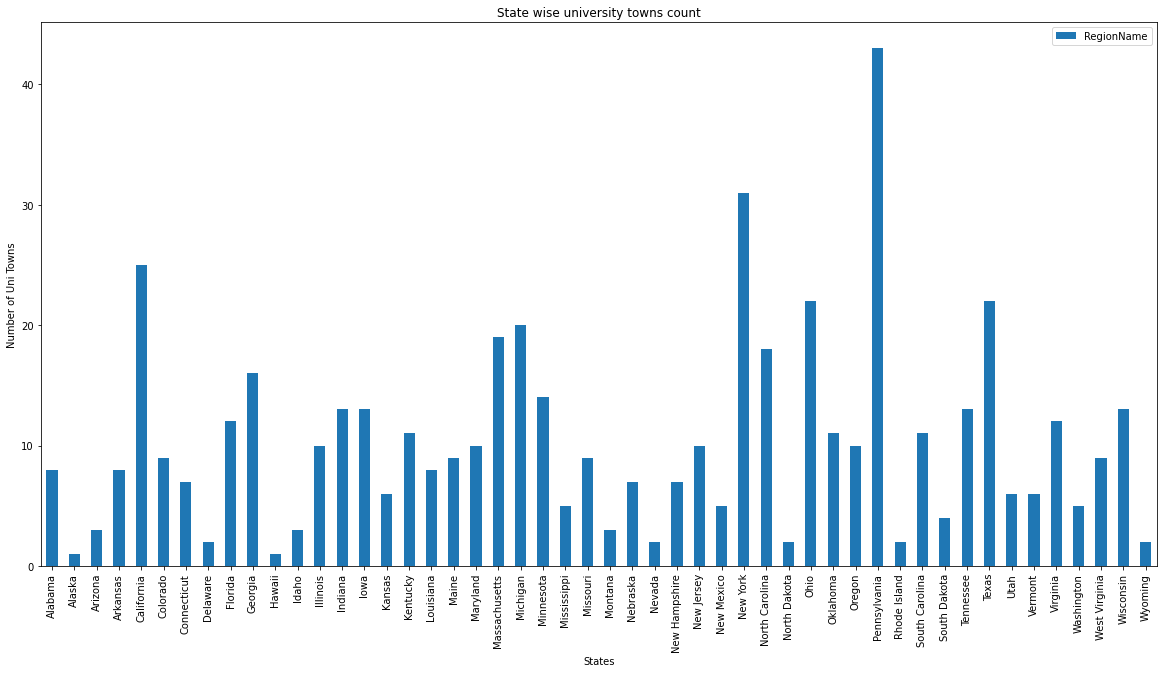

In [259]:
state_uni_town_count = mapped_uni_town_data.groupby(by='State').count()
#plt.figure(figsize=(20,40))
state_uni_town_count.plot(kind='bar', title='State wise university towns count', ylabel='Number of Uni Towns',
         xlabel='States', figsize=(20,10))

# Reformatting GDP data

In [261]:
#neglecting all the information before y2k year and renaming th colnames
gdp_y2k = gdp[['Unnamed: 4','Unnamed: 5']]
gdp_y2k.columns = ['Quarter', 'GDP']
y2k_loc = gdp_y2k.index[gdp_y2k['Quarter'] == '2000q1']
y2k_loc[0]
gdp_y2k = gdp_y2k.iloc[y2k_loc[0]:]
gdp_y2k.reset_index(drop=True, inplace=True)
gdp_y2k.head()

,Quarter,GDP
0,2000q1,10031.0
1,2000q2,10278.3
2,2000q3,10357.4
3,2000q4,10472.3
4,2001q1,10508.1


<AxesSubplot:title={'center':'Highest GDP Quarters'}, xlabel='Quarter', ylabel='GDP'>

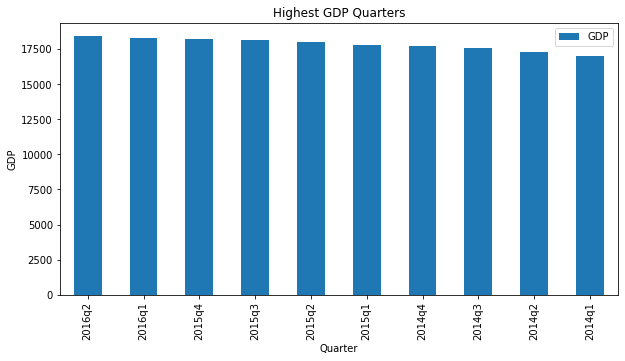

In [262]:
# plotting 10 quarters with highest gdp
highest_ten_quarters = gdp_y2k.nlargest(10, 'GDP')
highest_ten_quarters.reset_index(drop=True, inplace=True)
highest_ten_quarters.plot(x='Quarter', y='GDP', kind='bar', title='Highest GDP Quarters', ylabel='GDP',
         xlabel='Quarter', figsize=(10,5))

<AxesSubplot:title={'center':'Lowest GDP Quarters'}, xlabel='Quarter', ylabel='GDP'>

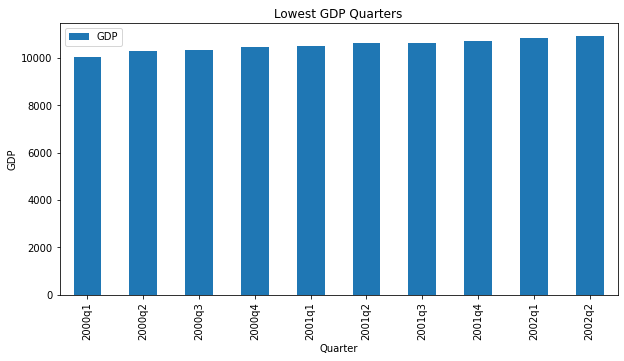

In [263]:
# plotting 10 quarters with lowest gdp
highest_ten_quarters = gdp_y2k.nsmallest(10, 'GDP')
#highest_ten_quarters.reset_index(drop=True, inplace=True)
highest_ten_quarters.plot(x='Quarter', y='GDP', kind='bar', title='Lowest GDP Quarters', ylabel='GDP',
         xlabel='Quarter', figsize=(10,5))

<AxesSubplot:title={'center':'GDP Trend'}, xlabel='Quarter', ylabel='GDP'>

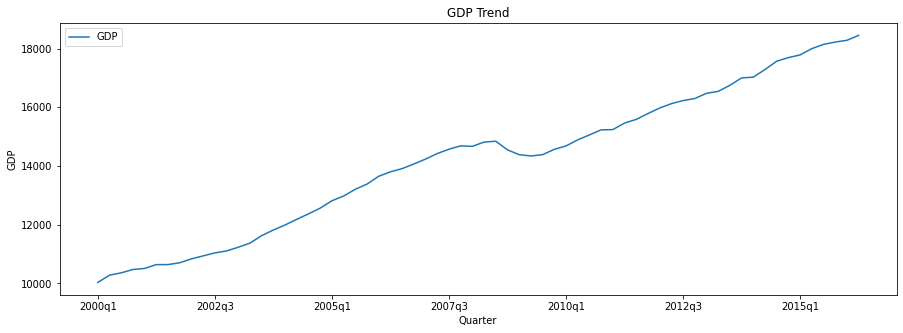

In [269]:
# GDP trend throughout the years
gdp_y2k.plot(x='Quarter', y='GDP', title='GDP Trend', ylabel='GDP',
         xlabel='Quarter', figsize=(15,5))

# Determining recession start

In [265]:
# calculating the quarter when recession started
recession_start_quarter= ''
for i in range(len(gdp_y2k) - 4):
        if ((gdp_y2k.iloc[i][1] > gdp_y2k.iloc[i+1][1]) & (gdp_y2k.iloc[i+1][1] > gdp_y2k.iloc[i+2][1])):
            recession_start_quarter = gdp_y2k.iloc[i][0]
            break
recession_start_quarter

'2008q3'

# Determining recession end

In [266]:
recession_end_quarter= ''
recession_start_index = gdp_y2k.index[gdp_y2k['Quarter'] == recession_start_quarter]
print(recession_start_index)
for i in range(recession_start_index[0], len(gdp_y2k) - 4):
        if ((gdp_y2k.iloc[i][1] < gdp_y2k.iloc[i+1][1]) & (gdp_y2k.iloc[i+1][1] < gdp_y2k.iloc[i+2][1])):
            recession_end_quarter = gdp_y2k.iloc[i+2][0]
            break
recession_end_quarter

Int64Index([34], dtype='int64')


'2009q4'

# Determining least performing quarter during recession

In [267]:
recession_end_index = gdp_y2k.index[gdp_y2k['Quarter'] == recession_end_quarter]

recession_period = gdp_y2k.iloc[recession_start_index[0]: recession_end_index[0]]
recession_period

recession_bottom = recession_period.Quarter[recession_period.GDP.idxmin()]
recession_bottom


'2009q2'

# State & Acronyms dictionary

In [273]:
import json

with open("regions_with_codes.json") as file:
    content = file.read()
    
state_codes = json.loads(content)
print(type(state_codes))
state_codes

<class 'dict'>


{'OH': 'Ohio',
 'KY': 'Kentucky',
 'AS': 'American Samoa',
 'NV': 'Nevada',
 'WY': 'Wyoming',
 'NA': 'National',
 'AL': 'Alabama',
 'MD': 'Maryland',
 'AK': 'Alaska',
 'UT': 'Utah',
 'OR': 'Oregon',
 'MT': 'Montana',
 'IL': 'Illinois',
 'TN': 'Tennessee',
 'DC': 'District of Columbia',
 'VT': 'Vermont',
 'ID': 'Idaho',
 'AR': 'Arkansas',
 'ME': 'Maine',
 'WA': 'Washington',
 'HI': 'Hawaii',
 'WI': 'Wisconsin',
 'MI': 'Michigan',
 'IN': 'Indiana',
 'NJ': 'New Jersey',
 'AZ': 'Arizona',
 'GU': 'Guam',
 'MS': 'Mississippi',
 'PR': 'Puerto Rico',
 'NC': 'North Carolina',
 'TX': 'Texas',
 'SD': 'South Dakota',
 'MP': 'Northern Mariana Islands',
 'IA': 'Iowa',
 'MO': 'Missouri',
 'CT': 'Connecticut',
 'WV': 'West Virginia',
 'SC': 'South Carolina',
 'LA': 'Louisiana',
 'KS': 'Kansas',
 'NY': 'New York',
 'NE': 'Nebraska',
 'OK': 'Oklahoma',
 'FL': 'Florida',
 'CA': 'California',
 'CO': 'Colorado',
 'PA': 'Pennsylvania',
 'DE': 'Delaware',
 'NM': 'New Mexico',
 'RI': 'Rhode Island',
 'MN': 'M

# Formatting of Housing data

In [275]:
 # removing unnecessary columns from the dataset which have the data before year 2000
#homes_y2k = homes.drop(homes.columns[[0,1,3,4] + list(range(6,56))], axis=1)
homes_y2k = homes.drop(homes.columns[[0] + list(range(3,51))], axis=1)
homes_y2k["State"] = homes_y2k["State"].replace(state_codes)
homes_y2k.set_index(["State", "RegionName"], inplace=True)
#print(homes_y2k.head())

# Colnames have full date with them which is a difficuly for further quarterly analysis
# so converting them into mm/yyyy format
date_colnames = homes_y2k.columns.values.tolist()
for i in range(0, len(date_colnames)):
    date_obj = datetime.datetime.strptime(date_colnames[i], '%Y-%m')
    date_colnames[i] = date_obj.strftime('%m/%Y')
homes_y2k.columns = date_colnames
homes_y2k



,,01/2000,02/2000,03/2000,04/2000,05/2000,06/2000,07/2000,08/2000,09/2000,10/2000,...,11/2015,12/2015,01/2016,02/2016,03/2016,04/2016,05/2016,06/2016,07/2016,08/2016
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
California,Los Angeles,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,222800.0,224300.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
Illinois,Chicago,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,149000.0,150400.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
Pennsylvania,Philadelphia,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,54500.0,54700.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
Arizona,Phoenix,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,116500.0,117200.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101100.0,101500.0,102700.0,103700.0,105200.0,107300.0,110000.0,111800.0,112300.0,112900.0,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
New York,Urbana,77600.0,79400.0,80600.0,80200.0,81000.0,83800.0,88700.0,92400.0,94000.0,96300.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
Wisconsin,New Denmark,113900.0,114000.0,115800.0,117600.0,119100.0,121100.0,123900.0,126200.0,128100.0,129600.0,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900


# converting monthly housing prices into quarterly mean values

In [279]:
# get month on basis of quarter and index
quarters = ['q1', 'q2', 'q3', 'q4']
def get_quarter_month(qtr, idx, year):
    quarter_month= ''
    if qtr == quarters[0] and idx == 1:
        quarter_month = '01' + '/' + str(year)
    elif qtr == quarters[0] and idx == 2:
        quarter_month = "02" + '/' + str(year)
    elif qtr == quarters[0] and idx == 3:
        quarter_month = "03" + '/' + str(year)
    elif qtr == quarters[1] and idx == 1:
        quarter_month = "04" + '/' + str(year)
    elif qtr == quarters[1] and idx == 2:
        quarter_month = "05" + '/' + str(year)
    elif qtr == quarters[1] and idx == 3:
        quarter_month = "06" + '/' + str(year)
    elif qtr == quarters[2] and idx == 1:
        quarter_month = "07" + '/' + str(year)
    elif qtr == quarters[2] and idx == 2:
        quarter_month = "08" + '/' + str(year)
    elif qtr == quarters[2] and idx == 3:
        quarter_month = "09" + '/' + str(year)
    elif qtr == quarters[3] and idx == 1:
        quarter_month = "10" + '/' + str(year)
    elif qtr == quarters[3] and idx == 2:
        quarter_month = "11" + '/' + str(year)
    elif qtr == quarters[3] and idx == 3:
        quarter_month = "12" + '/' + str(year)
    return quarter_month

# conversion of monthly house prices into quarters
homes_y2k_quarterly = pd.DataFrame()


for year in range(2000, 2016):
    for quarter in quarters:
        homes_y2k_quarterly[str(year) + quarter] = homes_y2k[[get_quarter_month(quarter, 1, year), get_quarter_month(quarter, 2, year), get_quarter_month(quarter, 3, year)]].mean(axis = 1)
homes_y2k_quarterly

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2013q3,2013q4,2014q1,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,481366.666667,492433.333333,503133.333333,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,455066.666667,471933.333333,484266.666667,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,180800.000000,185866.666667,190900.000000,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,111000.000000,112466.666667,113733.333333,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,153400.000000,159900.000000,163233.333333,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,Town of Wrightstown,101766.666667,105400.000000,111366.666667,114866.666667,125966.666667,129900.000000,129900.000000,129433.333333,131900.000000,134200.000000,...,142933.333333,142766.666667,143733.333333,144866.666667,146866.666667,149233.333333,148666.666667,149333.333333,149866.666667,149933.333333
New York,Urbana,79200.000000,81666.666667,91700.000000,98366.666667,94866.666667,98533.333333,102966.666667,98033.333333,93966.666667,94600.000000,...,126666.666667,127133.333333,128466.666667,132133.333333,137033.333333,140066.666667,141700.000000,137866.666667,136466.666667,136166.666667
Wisconsin,New Denmark,114566.666667,119266.666667,126066.666667,131966.666667,143800.000000,146966.666667,148366.666667,149166.666667,153133.333333,156733.333333,...,177133.333333,173666.666667,173733.333333,174566.666667,181166.666667,186166.666667,187600.000000,188666.666667,188433.333333,188933.333333


In [280]:
# extracting house prices for the quarter before recession started

quarter_before_recession = homes_y2k_quarterly.columns[homes_y2k_quarterly.columns.get_loc(recession_start_quarter) - 1]
#housing_data_ratio = homes_y2k_quarterly[[recession_bottom, quarter_before_recession]]
#housing_data_ratio['ratio'] =  housing_data_ratio[quarter_before_recession] / housing_data_ratio[recession_bottom]
#housing_data_ratio = housing_data_ratio.reset_index()
#housing_data_ratio


# calculating the ratio between the pricess of recession bottom and quarter before recession started
homes_y2k_quarterly['ratio'] = homes_y2k_quarterly[quarter_before_recession] / homes_y2k_quarterly[recession_bottom]
homes_y2k_quarterly = homes_y2k_quarterly [[recession_bottom, quarter_before_recession, 'ratio']]
homes_y2k_quarterly = homes_y2k_quarterly.reset_index()
homes_y2k_quarterly



,State,RegionName,2009q2,2008q2,ratio
0,New York,New York,465833.333333,503933.333333,1.081789
1,California,Los Angeles,413900.000000,502266.666667,1.213498
2,Illinois,Chicago,219700.000000,237900.000000,1.082840
3,Pennsylvania,Philadelphia,116166.666667,118133.333333,1.016930
4,Arizona,Phoenix,168233.333333,205266.666667,1.220131
...,...,...,...,...,...
10725,Wisconsin,Town of Wrightstown,144833.333333,149966.666667,1.035443
10726,New York,Urbana,123433.333333,115900.000000,0.938968
10727,Wisconsin,New Denmark,178833.333333,173466.666667,0.969991
10728,California,Angels,282866.666667,328033.333333,1.159675


# Merging University town data and housing data

In [281]:
unitown_housing_data = pd.merge(homes_y2k_quarterly,mapped_uni_town_data,how='inner',on=['State','RegionName'])
unitown_housing_data['IsUniversityTown'] = True
#print(quarter_before_recession)
#print(recession_bottom)
clubbed_housing_data =  pd.merge(homes_y2k_quarterly, unitown_housing_data, how='outer', on=['State','RegionName',recession_bottom, quarter_before_recession, 'ratio'])
clubbed_housing_data['IsUniversityTown'] = clubbed_housing_data['IsUniversityTown'].fillna(False)

university_town_prices = clubbed_housing_data[clubbed_housing_data['IsUniversityTown'] == True]
non_university_town_prices = clubbed_housing_data[clubbed_housing_data['IsUniversityTown'] == False]


# visualising the difference between prices

<AxesSubplot:title={'center':'State wise mean prices before recession and during recession bottom'}, xlabel='States', ylabel='Mean State Prices'>

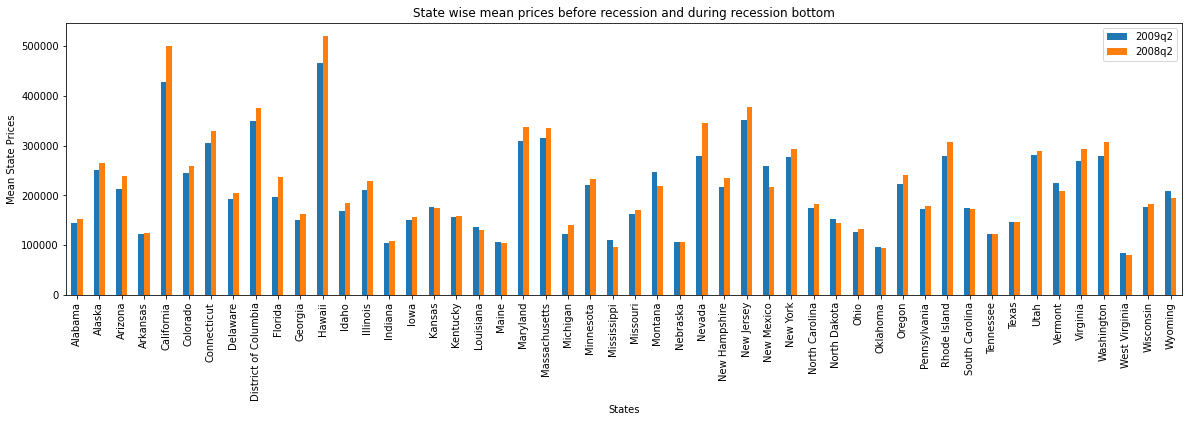

In [293]:
homes_y2k_quarterly_grouped = homes_y2k_quarterly.groupby('State').mean()
homes_y2k_quarterly_grouped.drop('ratio', axis=1, inplace=True)
homes_y2k_quarterly_grouped.plot(kind='bar', title='State wise mean prices before recession and during recession bottom', ylabel='Mean State Prices',
         xlabel='States', figsize=(20,5))

# Perform TTest analysis on University and non university towns

In [294]:
from scipy.stats import ttest_ind

t,p = ttest_ind(university_town_prices['ratio'].dropna(), non_university_town_prices['ratio'].dropna())
different_prices = True if p<0.01 else False
better_family = "university town" if university_town_prices['ratio'].mean() < non_university_town_prices['ratio'].mean() else "non-university town"
print(different_prices, p, better_family)

True 0.002724063704761454 university town
